# Custom Training

In [1]:
from __future__ import absolute_import, division, print_function

In [3]:
import os
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe

In [5]:
tf.enable_eager_execution()

In [7]:
print(tf.__version__)
tf.executing_eagerly()

1.10.0


True

## Iris Classification Problem.

In [8]:
train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"


In [9]:
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                          origin=train_dataset_url)

8192/2194 [================================================================================================================] - 0s 0us/step


In [10]:
print("Dataset file: {}".format(train_dataset_fp))

Dataset file: C:\Users\javedsha\.keras\datasets\iris_training.csv


In [12]:
import pandas as pd

In [13]:
file = pd.read_csv(train_dataset_fp)

In [16]:
file.columns

Index(['120', '4', 'setosa', 'versicolor', 'virginica'], dtype='object')

In [17]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [18]:
feature_names = column_names[:-1]

In [19]:
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [20]:
label_name = column_names[-1]

In [21]:
label_name

'species'

In [22]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [23]:
batch_size = 32

In [24]:
train_dataset = tf.contrib.data.make_csv_dataset(
train_dataset_fp,
batch_size,
column_names=column_names,
label_name=label_name,
num_epochs=1)

In [25]:
features, labels = next(iter(train_dataset))

In [26]:
features

OrderedDict([('sepal_length',
              <tf.Tensor: id=60, shape=(32,), dtype=float32, numpy=
              array([7.2, 6.2, 7.2, 5.4, 5. , 6.4, 6.5, 5. , 5.8, 4.7, 5. , 5.1, 4.9,
                     5.6, 5. , 4.4, 4.6, 5.7, 6.4, 5. , 4.9, 6.4, 4.8, 5.9, 5.7, 6.7,
                     4.9, 6.3, 7.2, 5.4, 6. , 5.6], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=61, shape=(32,), dtype=float32, numpy=
              array([3. , 2.2, 3.2, 3. , 3.5, 2.7, 3. , 3.4, 2.8, 3.2, 3.3, 3.8, 2.4,
                     2.5, 3.5, 2.9, 3.1, 2.9, 2.8, 3. , 3.1, 3.2, 3. , 3.2, 2.8, 3.1,
                     2.5, 3.3, 3.6, 3.9, 3. , 2.7], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=58, shape=(32,), dtype=float32, numpy=
              array([5.8, 4.5, 6. , 4.5, 1.3, 5.3, 5.8, 1.6, 5.1, 1.3, 1.4, 1.9, 3.3,
                     3.9, 1.6, 1.4, 1.5, 4.2, 5.6, 1.6, 1.5, 5.3, 1.4, 4.8, 4.1, 4.4,
                     4.5, 6. , 6.1, 1.3, 4.8, 4.2],

In [27]:
labels

<tf.Tensor: id=62, shape=(32,), dtype=int32, numpy=
array([2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2,
       0, 1, 1, 1, 2, 2, 2, 0, 2, 1])>

Text(0,0.5,'Sepal length')

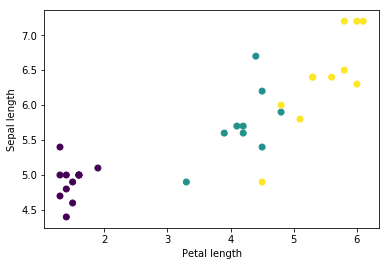

In [29]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")

In [30]:
def pack_features_vectors(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [31]:
train_dataset = train_dataset.map(pack_features_vectors)

In [32]:
features, labels = next(iter(train_dataset))

In [33]:
print(features[:5])

tf.Tensor(
[[5.7 3.  4.2 1.2]
 [6.7 3.1 4.4 1.4]
 [6.3 3.3 6.  2.5]
 [4.8 3.  1.4 0.1]
 [6.5 2.8 4.6 1.5]], shape=(5, 4), dtype=float32)


In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [35]:
predictions = model(features)

In [36]:
predictions[:5]

<tf.Tensor: id=243, shape=(5, 3), dtype=float32, numpy=
array([[-2.8765500e-03,  3.9759555e+00,  1.8850139e+00],
       [ 5.1843524e-03,  4.3306007e+00,  2.0948019e+00],
       [ 7.1485043e-03,  4.4729204e+00,  2.0275269e+00],
       [-1.2110427e-02,  3.1750042e+00,  1.4523885e+00],
       [ 3.9344430e-03,  4.2162781e+00,  2.0449843e+00]], dtype=float32)>

In [37]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=249, shape=(5, 3), dtype=float32, numpy=
array([[0.01637734, 0.8754434 , 0.1081792 ],
       [0.01180933, 0.8927498 , 0.09544093],
       [0.01046799, 0.91059107, 0.07894097],
       [0.03384802, 0.81974655, 0.1464054 ],
       [0.01312107, 0.88586384, 0.10101505]], dtype=float32)>

In [38]:
print("Predictions before training: {}".format(tf.argmax(predictions, axis=1)))

Predictions before training: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [39]:
print("     Labels: {}".format(labels))

     Labels: [1 1 2 0 1 2 2 2 2 2 1 2 0 1 0 0 0 1 1 2 0 2 1 1 0 1 2 2 2 2 2 2]


In [40]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

In [41]:
l = loss(model, features, labels)

In [42]:
print("Loss test: {}".format(l))

Loss test: 1.9630749225616455


In [43]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [44]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

global_step = tf.train.get_or_create_global_step()

In [45]:
loss_value, grads = grad(model, features, labels)

In [46]:
print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

Step: 0, Initial Loss: 1.9630749225616455


In [47]:
optimizer.apply_gradients(zip(grads, model.variables), global_step)

In [50]:
print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 1, Initial Loss: 1.5682635307312012


In [51]:
train_loss_results = []
train_accuracy_results = []

In [52]:
num_epochs = 201

In [53]:
for epoch in range(num_epochs):
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()
    
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        
        optimizer.apply_gradients(zip(grads, model.variables), global_step)
        
        epoch_loss_avg(loss_value)
        epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
    
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                   epoch_loss_avg.result(),
                                                                   epoch_accuracy.result()))

Epoch 000: Loss: 1.569, Accuracy: 29.167%
Epoch 050: Loss: 0.551, Accuracy: 74.167%
Epoch 100: Loss: 0.353, Accuracy: 94.167%
Epoch 150: Loss: 0.233, Accuracy: 96.667%
Epoch 200: Loss: 0.172, Accuracy: 98.333%


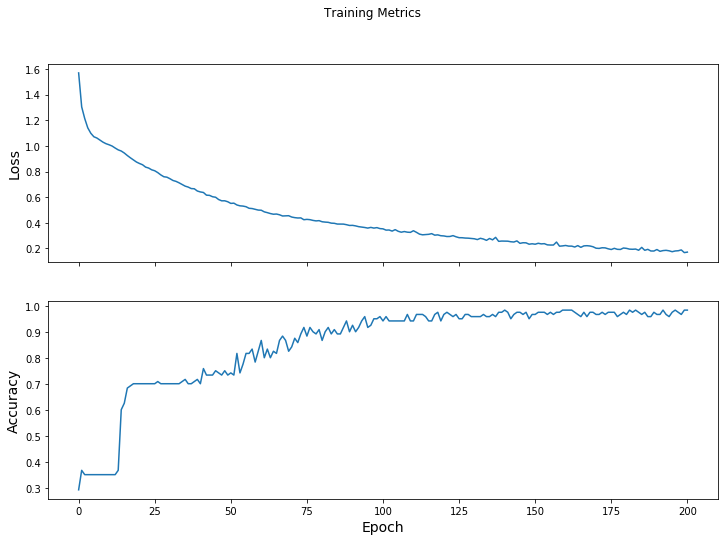

In [54]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

In [55]:
test_url = "http://download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [57]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size, 
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vectors)

In [58]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [59]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=115209, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [60]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.3%)
Example 1 prediction: Iris versicolor (88.2%)
Example 2 prediction: Iris virginica (70.4%)
